**Importing Libraries**

In [2]:
import  matplotlib.pyplot  as plt
from  sklearn.model_selection import train_test_split
from  sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from  sklearn.compose import ColumnTransformer
from  sklearn.metrics import accuracy_score
from  sklearn.linear_model import LinearRegression,LogisticRegression
from  sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load and Preprocess the Data**

In [8]:
import os
os.listdir('/kaggle/input/titanic-data/')

['test-file']

In [15]:
url   = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

df  = pd.read_csv(url)

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df = df[['Fare',"Pclass","Sex",'SibSp', "Parch","Age","Embarked","Survived"]]#  main feature

#handling missinng values 
df['Age']=   df["Age"].replace(0,np.nan).fillna(df['Age'].mean())

In [18]:
df.duplicated().sum()

111

In [19]:
df.drop_duplicates()

,Fare,Pclass,Sex,SibSp,Parch,Age,Embarked,Survived
0,7.2500,3,male,1,0,22.000000,S,0
1,71.2833,1,female,1,0,38.000000,C,1
2,7.9250,3,female,0,0,26.000000,S,1
3,53.1000,1,female,1,0,35.000000,S,1
4,8.0500,3,male,0,0,35.000000,S,0
...,...,...,...,...,...,...,...,...
885,29.1250,3,female,0,5,39.000000,Q,0
887,30.0000,1,female,0,0,19.000000,S,1
888,23.4500,3,female,1,2,29.699118,S,0
889,30.0000,1,male,0,0,26.000000,C,1


In [20]:
df['Age']=   df["Age"].replace(0,np.nan).fillna(df['Age'].mean())

In [21]:
df["Age"]  = df['Age'].astype(int)

In [22]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [23]:
df.isnull().sum()

Fare        0
Pclass      0
Sex         0
SibSp       0
Parch       0
Age         0
Embarked    0
Survived    0
dtype: int64

In [24]:
df.dtypes

Fare        float64
Pclass        int64
Sex          object
SibSp         int64
Parch         int64
Age           int64
Embarked     object
Survived      int64
dtype: object

In [25]:
df.head()

,Fare,Pclass,Sex,SibSp,Parch,Age,Embarked,Survived
0,7.2500,3,male,1,0,22,S,0
1,71.2833,1,female,1,0,38,C,1
2,7.9250,3,female,0,0,26,S,1
3,53.1000,1,female,1,0,35,S,1
4,8.0500,3,male,0,0,35,S,0


**Feature Engineering** 

In [26]:
# feature enginerring 
df['Sex']=df['Sex'].map({'male': 0  , 'female' : 1})

df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

#bining
bins  = [0,12,18,60,120]
labels =  ["child", "teen","adults","senior_adults"]
df['Age_group'] =  pd.cut(df['Age'] , bins=bins, labels=labels)
df['Age_group'] =  df['Age_group'].map({'child':0,'teen':1 ,'adults':2,'senior_adults':3})

df['family_size'] = df['Parch'] +  df["SibSp"]+1 #1for passenger themself

In [27]:
df.head()

,Fare,Pclass,Sex,SibSp,Parch,Age,Embarked,Survived,Age_group,family_size
0,7.2500,3,0,1,0,22,2,0,2,2
1,71.2833,1,1,1,0,38,0,1,2,2
2,7.9250,3,1,0,0,26,2,1,2,1
3,53.1000,1,1,1,0,35,2,1,2,2
4,8.0500,3,0,0,0,35,2,0,2,1


In [33]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    # Keep only rows within the limits
    return data[(data[column] >= lower_limit) & (data[column] <= upper_limit)]
(df,'Fare')
(df,'Age')

(        Fare  Pclass  Sex  SibSp  Parch  Age  Embarked  Survived Age_group  \
 0     7.2500       3    0      1      0   22         2         0         2   
 1    71.2833       1    1      1      0   38         0         1         2   
 2     7.9250       3    1      0      0   26         2         1         2   
 3    53.1000       1    1      1      0   35         2         1         2   
 4     8.0500       3    0      0      0   35         2         0         2   
 ..       ...     ...  ...    ...    ...  ...       ...       ...       ...   
 886  13.0000       2    0      0      0   27         2         0         2   
 887  30.0000       1    1      0      0   19         2         1         2   
 888  23.4500       3    1      1      2   29         2         0         2   
 889  30.0000       1    0      0      0   26         0         1         2   
 890   7.7500       3    0      0      0   32         1         0         2   
 
      family_size  
 0              2  
 1        

In [34]:
def remove_out_iqr(data,column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    IQR  =  q3 - q1
    lower_bound = q1 - 1.5 *IQR
    upper_bound =q3 +1.5 * IQR
    return data[(data[column]>lower_bound) & (data[column]  < upper_bound)]
    
cleand_data=remove_out_iqr(df,'Age')   #call  the   function 
cleand_data=remove_out_iqr(df,'Fare')   #call  the   function 

**Handling Outliers**

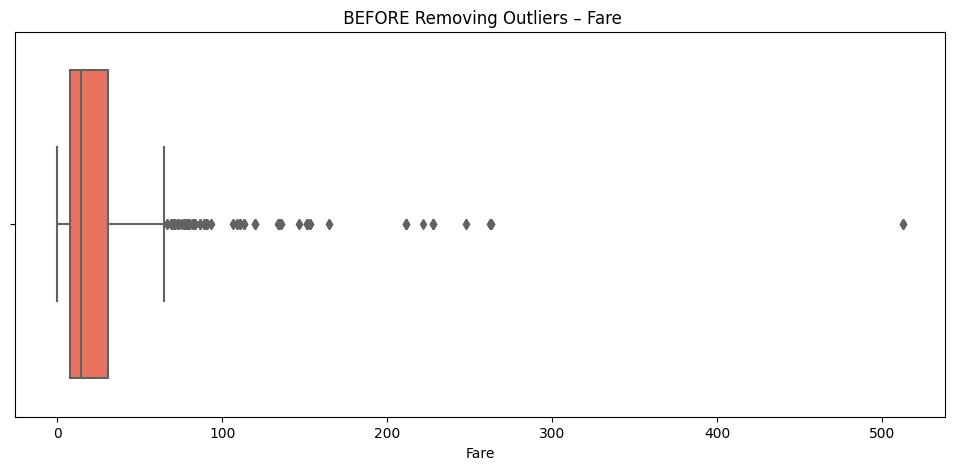

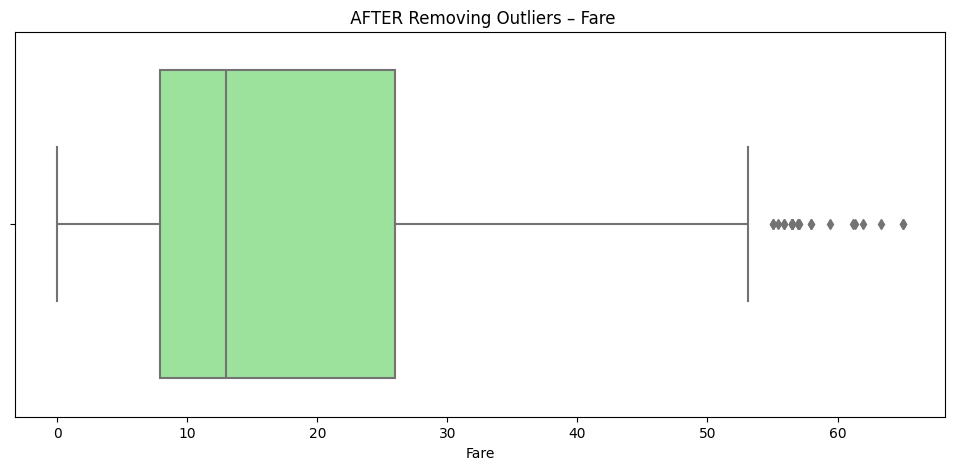

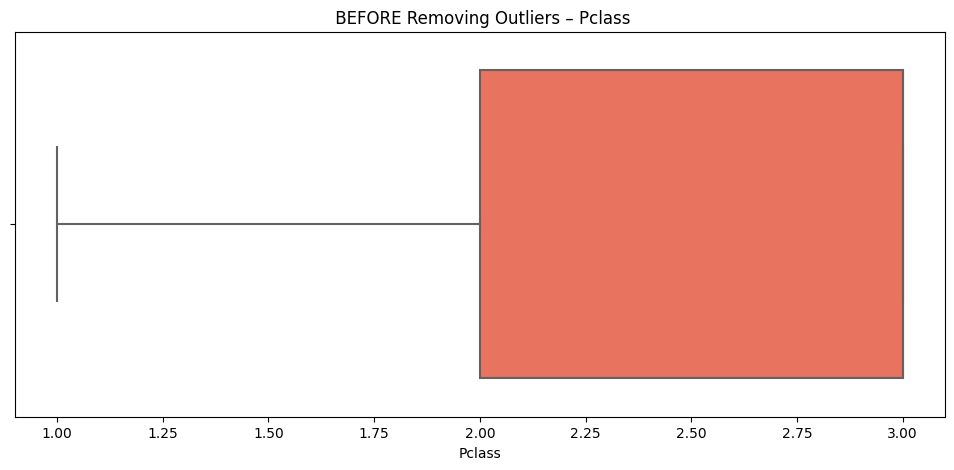

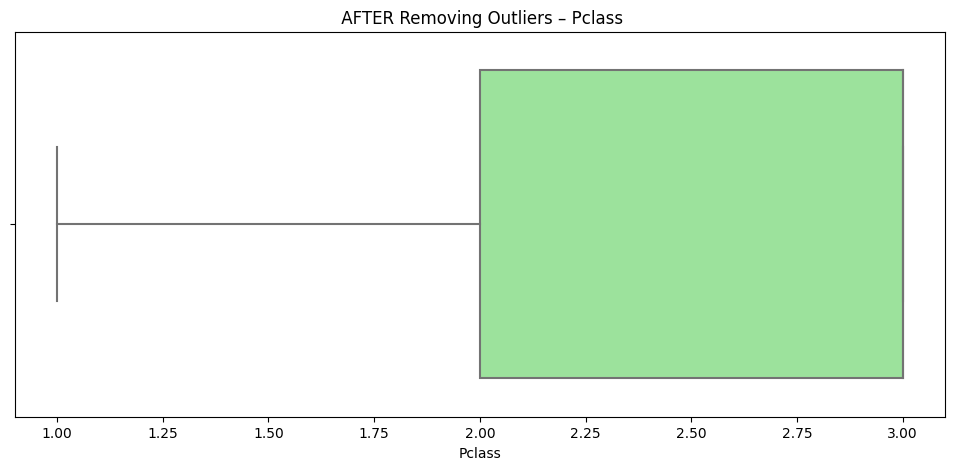

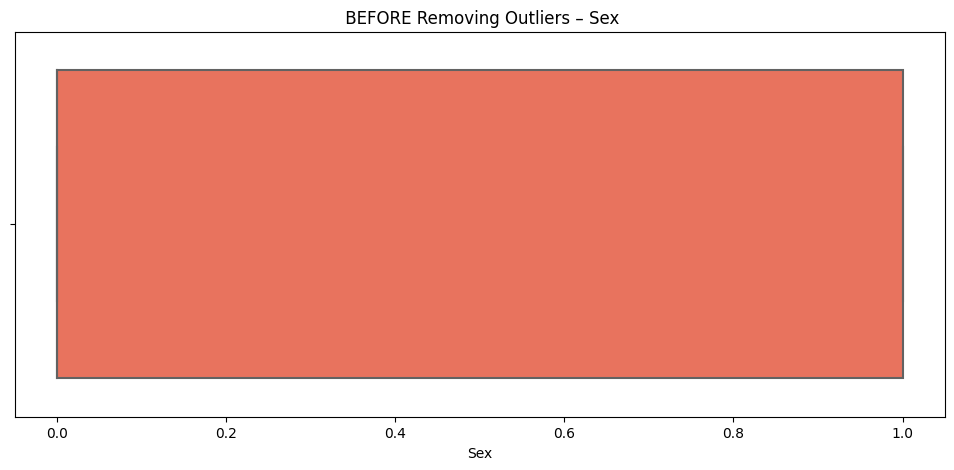

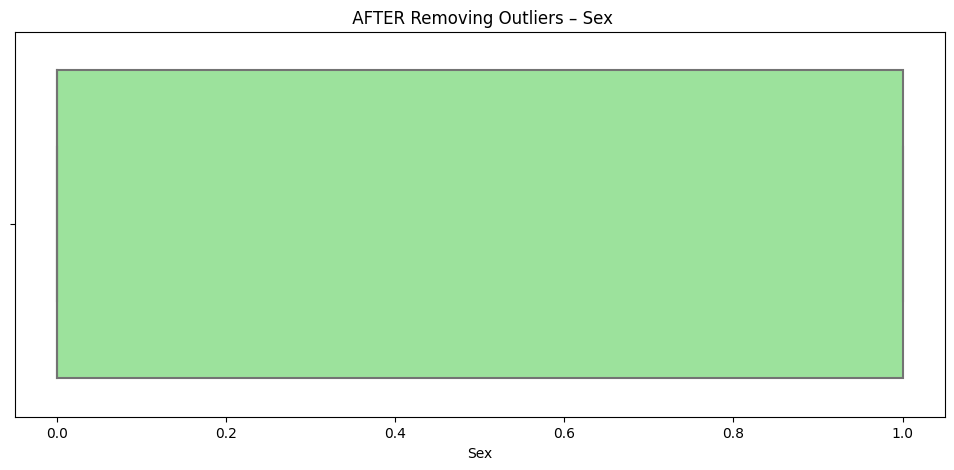

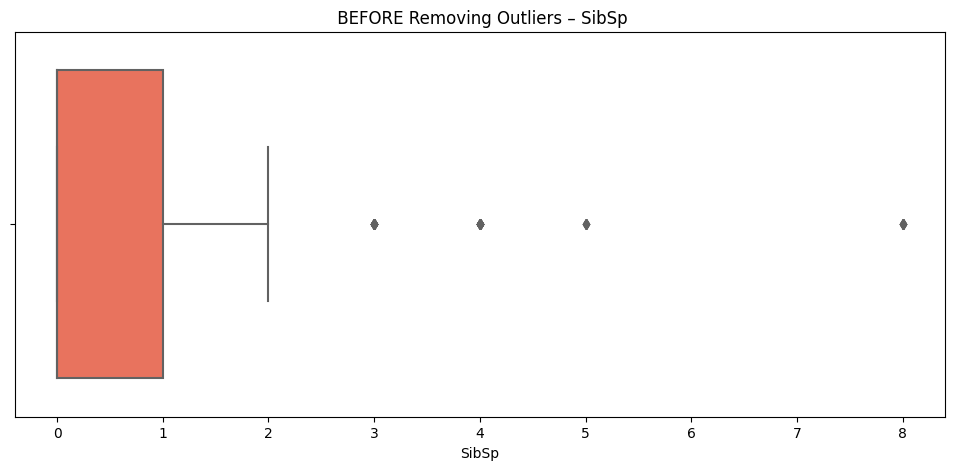

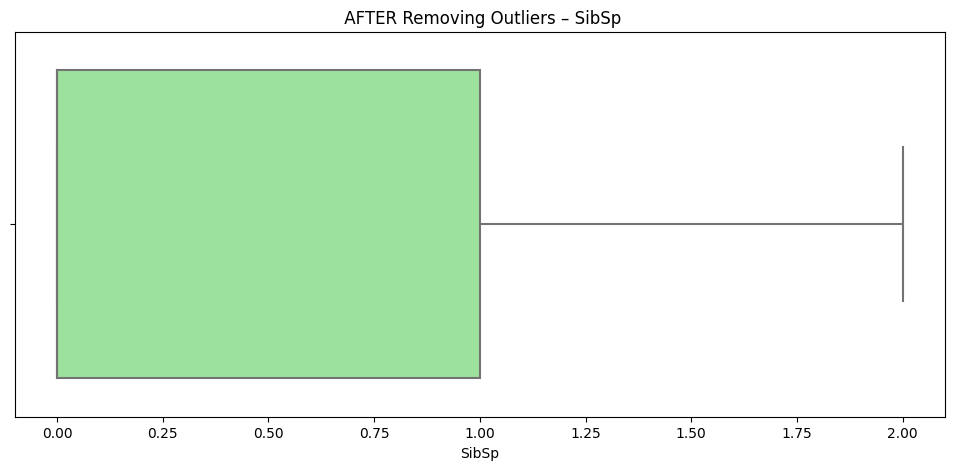

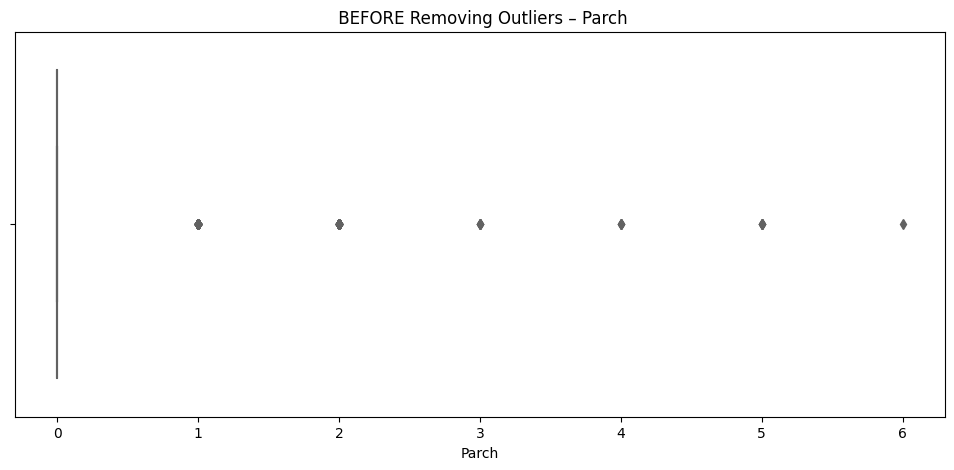

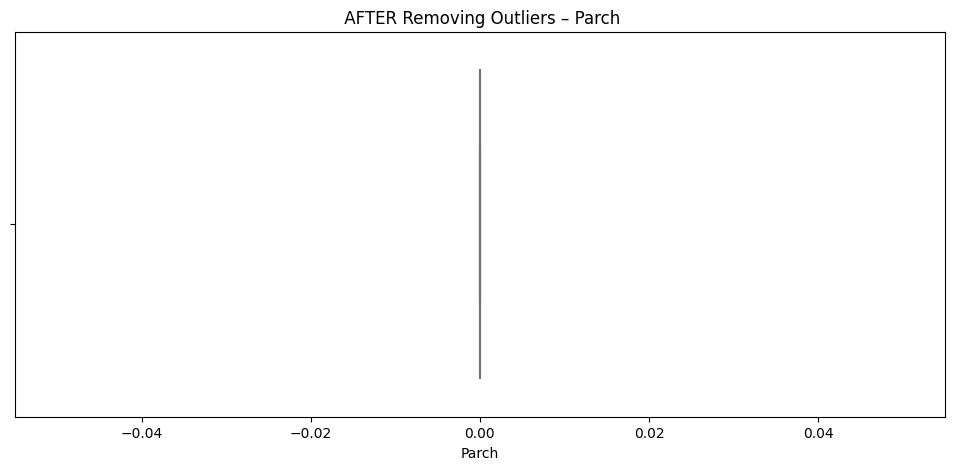

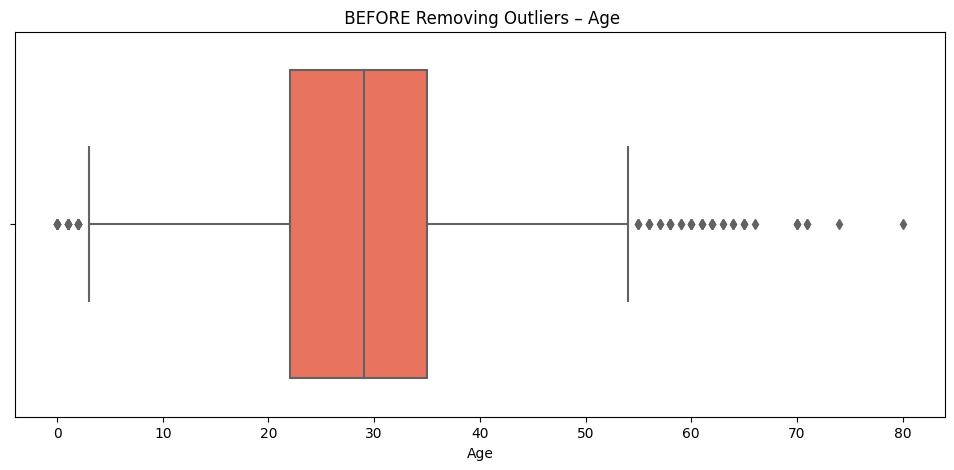

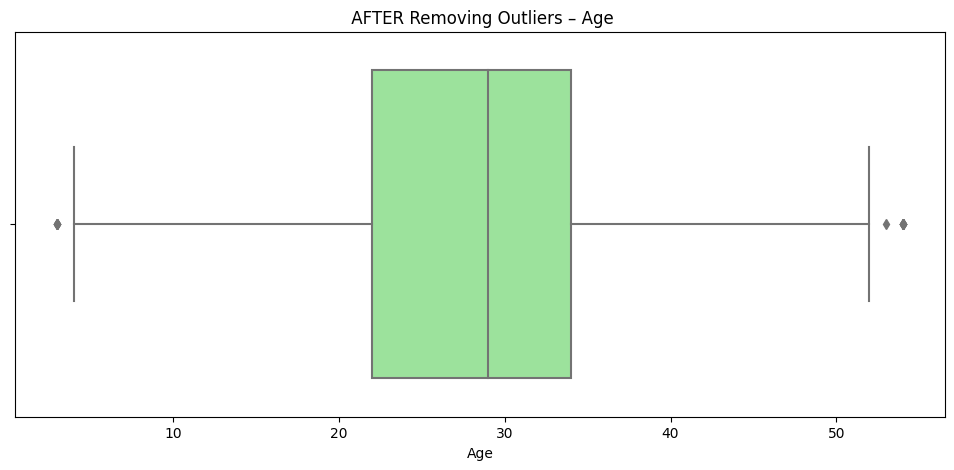

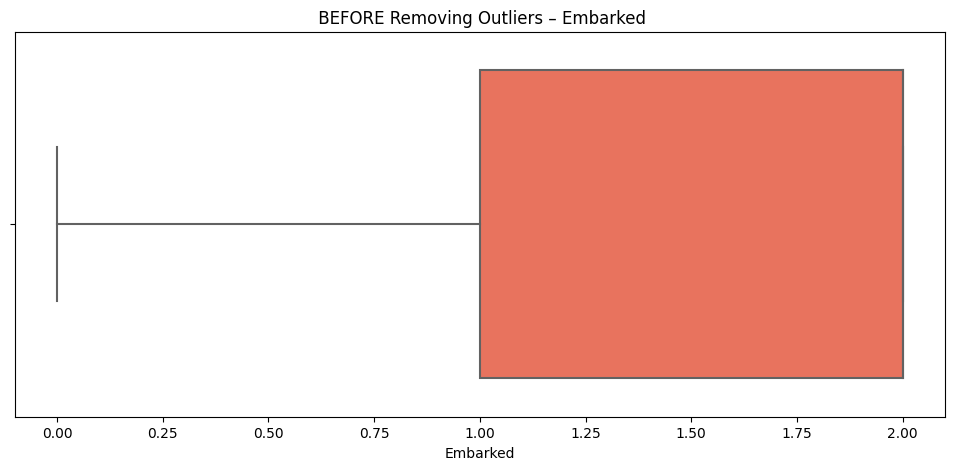

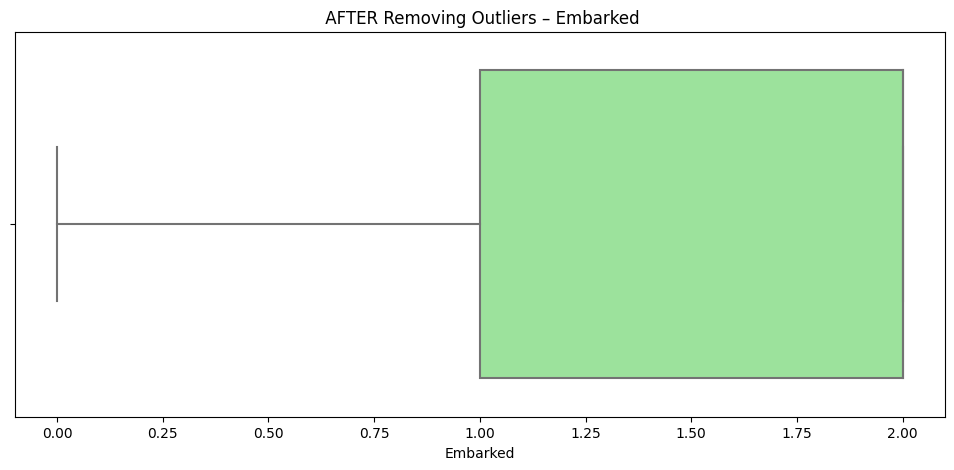

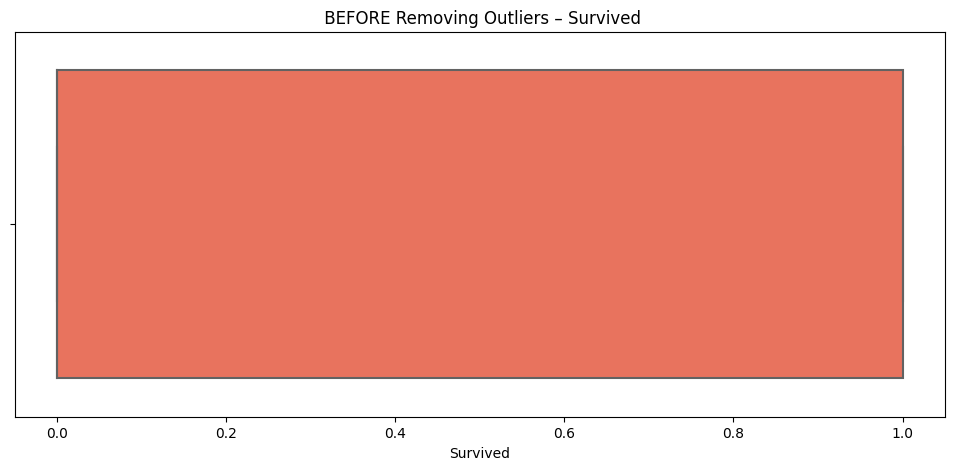

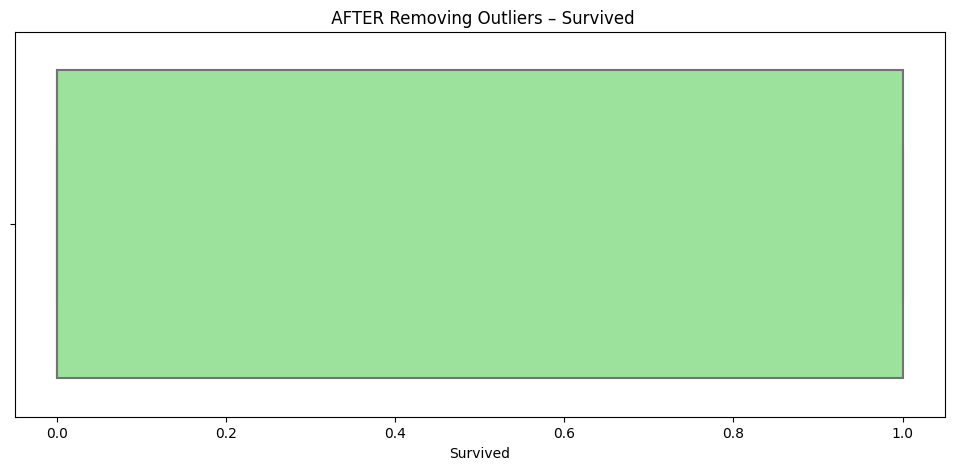

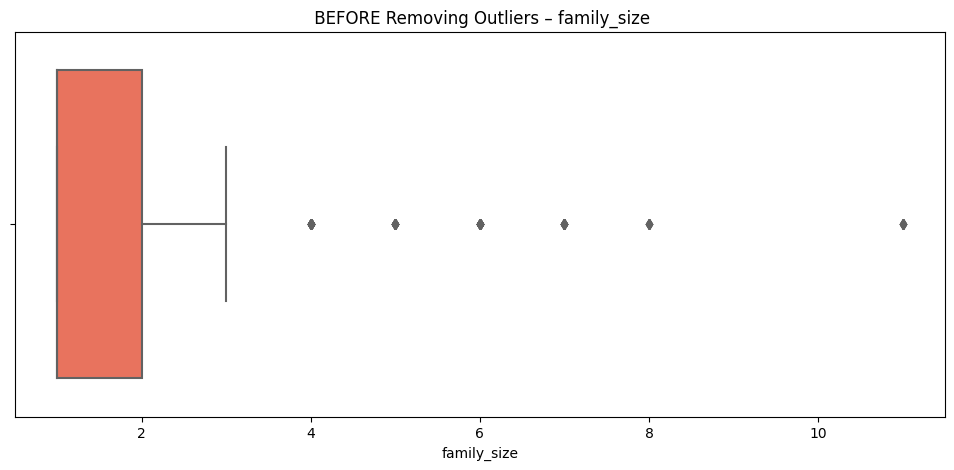

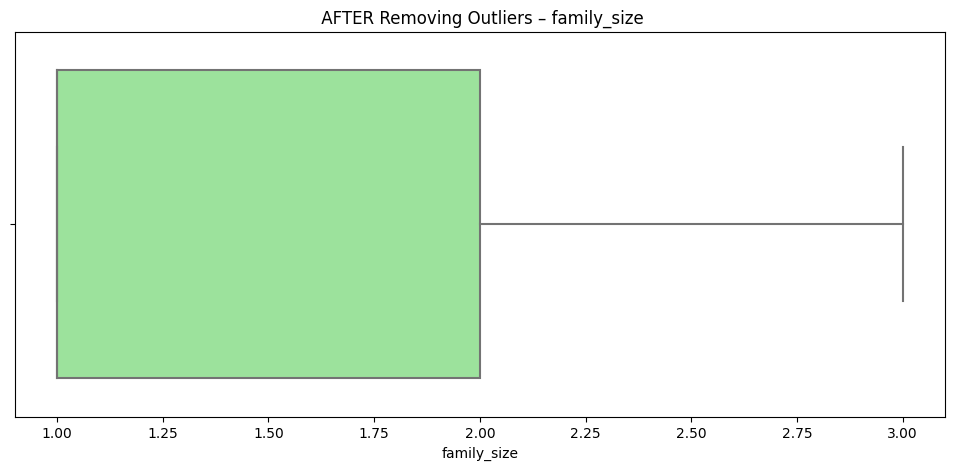

In [35]:
# Step 1: Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Step 2: IQR-based outlier removal function
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_limit) & (data[column] <= upper_limit)]

# Step 3: Loop through each numerical column
for col in numerical_cols:
    # Plot original boxplot
    plt.figure(figsize=(12, 5))
    sns.boxplot(x=df[col], color='tomato')
    plt.title(f' BEFORE Removing Outliers – {col}')
    plt.show()

    # Remove outliers from column
    cleaned_df = remove_outliers_iqr(df, col)

    # Plot cleaned boxplot
    plt.figure(figsize=(12, 5))
    sns.boxplot(x=cleaned_df[col], color='lightgreen')
    plt.title(f' AFTER Removing Outliers – {col}')
    plt.show()

**Apply pca+ model_Training +  model_evualation**

In [40]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_scaled = imputer.fit_transform(X_scaled)

In [41]:
import pandas as pd

# Convert to DataFrame to drop rows with missing values
X_scaled_df = pd.DataFrame(X_scaled)
X_scaled_df = X_scaled_df.dropna()

# Convert it back to NumPy array if needed
X_scaled = X_scaled_df.to_numpy()

In [43]:
print(df.columns)

Index(['Fare', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Age', 'Embarked',
       'Survived', 'Age_group', 'family_size'],
      dtype='object')


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Feature columns
feature_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Target column
target_col = 'Survived'

# Drop unnecessary columns (adjust based on actual column names)
df_cleaned = df.drop(columns=['Name', 'Ticket', 'Cabin'], errors='ignore')

# Define the feature matrix (X) and target (y)
X = df_cleaned[feature_cols + ['Sex', 'Embarked']]  
y = df_cleaned[target_col]

# Preprocessing pipeline
numeric_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Sex', 'Embarked']

# For numeric features, fill missing values and scale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Fill missing values with median
    ('scaler', StandardScaler())                   # Scale features
])

# For categorical features, fill missing values and apply one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))      # One-hot encode categorical features
])

# Combine both transformations using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the final pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=2)),  # Apply PCA for dimensionality reduction (after preprocessing)
    ('model', LogisticRegression())  # Logistic Regression model
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Fit the model
pipeline.fit(X_train, y_train)

# Evaluate the model
accuracy = pipeline.score(X_test, y_test)
print(f"Accuracy with Feature Engineering + PCA: {accuracy:.2f}")

Accuracy with Feature Engineering + PCA: 0.74


In [47]:
from  sklearn.model_selection  import  cross_val_score

scores = cross_val_score(pipeline,X_test, y_test,cv=10)
# Print results
print("Cross-Validation Scores:", scores)
print("Average Accuracy: {:.2f}%".format(scores.mean() * 100))

Cross-Validation Scores: [0.88888889 0.83333333 0.83333333 0.77777778 0.77777778 0.77777778
 0.66666667 0.77777778 0.77777778 0.70588235]
Average Accuracy: 78.17%
